In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import lsst.daf.persistence as dafPersist
from pfs.lam.opdb import *
from pfs.lam.analysisPlot import *
from pfs.lam.detAnalysis import *

import pandas as pd
import os
import re

In [3]:
experimentId = 125
cam = "b2"
rerun = "defocus" #"dcb2"

peaklist = "../SM2-defocus/Imqual_LAM_peaklist_DCB2-notfinal.csv"

In [4]:
peaklist = os.environ['LAM_SPS_ANALYSIS_DIR']+"/notebooks/devel/fmadec/SM2-defocus/Imqual_LAM_peaklist_DCB2-notfinal.csv"


In [5]:
visitStart, visitEnd = getVisitRange(experimentId)
print(visitStart, visitEnd)

23797 23816


In [6]:
drpPath = "/drp"
repo = "sps"
basePath = '/drp/analysis/sm2/'
arm = cam[0]


In [7]:
visit = int(visitStart)

In [8]:
print(f"{drpPath}/{repo}/rerun/{rerun}/detrend/")

butler = dafPersist.Butler(f"{drpPath}/{repo}/rerun/{rerun}/detrend/")
rbutler = dafPersist.Butler(f"{drpPath}/{repo}/")
rbutler.getKeys('raw')
lamps = rbutler.queryMetadata('raw', ['lamps'], visit=visit, arm=arm) 
print(f"lamps used: {lamps}")
calExp = butler.get("calexp", visit=visit, arm=cam[0])

/drp/sps/rerun/defocus/detrend/
lamps used: ['HgAr']


In [9]:
peaks = pd.read_csv(peaklist)
selected_peaks = peaks[peaks.arm == arm]
selected_peaks = selected_peaks[(selected_peaks.element.str.contains('|'.join(re.findall('[A-Z][^A-Z]*', "".join(lamps)))))]

#Fiber= 10 and #wavelength= 5


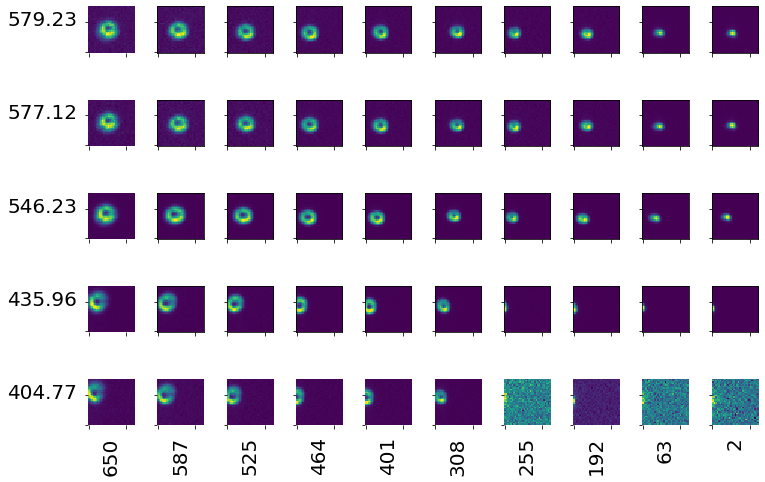

In [22]:
plotRoiPeak(calExp.image.array, selected_peaks, raw=True, roi_size=30)

In [ ]:
EE = 20
doPlot = True

In [ ]:
imdata = getImageQuality(calExp.image.array, selected_peaks,roi_size=24, EE=[EE], com=True, doPlot=doPlot)

In [45]:
dataId = dict(arm="b", spectrograph=2)
dataId.update(visit=int(visitStart))
exp = butler.get("calexp", dataId)
print(dataId)

{'arm': 'b', 'spectrograph': 2, 'visit': 23797}


In [ ]:
f"{dataId['arm']}{dataId['spectrograph']}"

In [ ]:
calexfilePath = butler.getUri("calexp", dataId)
print(calexfilePath)

In [ ]:
imageInfo = dict(dataId)
imageInfo.update(filename=calexfilePath)

In [ ]:
print(dataId)
print(imageInfo)

#Fiber= 10 and #wavelength= 5


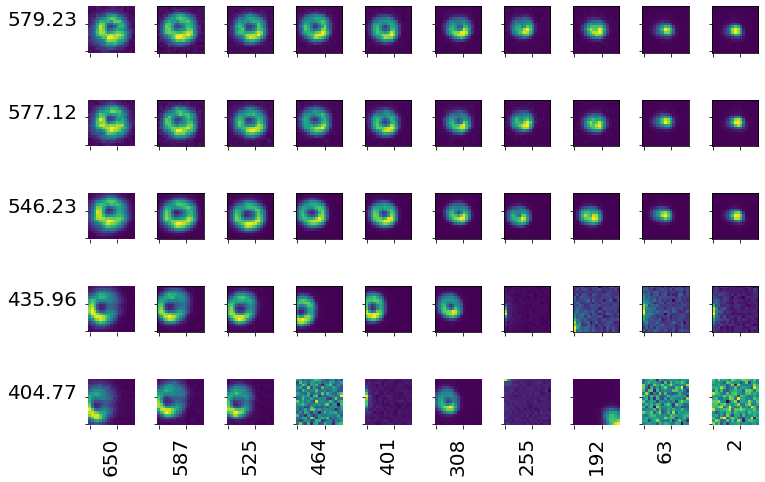

,px,py,oid_x,oid_y,EE3,TotEE3,EE5,TotEE5,peak,fiber,...,motor3,fcaFocus,fcaX,fcaY,fcaZ,ccdTemp,detBoxTemp,cam,obsdate,experimentId
0,4070.565430,488.967604,4070.565430,488.967604,0.077962,150.215836,0.322233,150.215836,9.0,2,...,9.91,0.99998,0.99998,-0.00001,-0.00002,163.3823,151.2956,b2,2020-12-14T00:00:38.000500000,125
1,3692.377681,477.316179,3692.377681,477.316179,0.079297,-149.420349,0.159997,-149.420349,9.0,63,...,9.91,0.99998,0.99998,-0.00001,-0.00002,163.3823,151.2956,b2,2020-12-14T00:00:38.000500000,125
2,2870.634185,472.318097,2870.634185,472.318097,0.000559,27957.447266,0.001013,27957.447266,9.0,192,...,9.91,0.99998,0.99998,-0.00001,-0.00002,163.3823,151.2956,b2,2020-12-14T00:00:38.000500000,125
3,2497.251139,450.829060,2497.251139,450.829060,0.001326,-10196.389648,0.003721,-10196.389648,9.0,255,...,9.91,0.99998,0.99998,-0.00001,-0.00002,163.3823,151.2956,b2,2020-12-14T00:00:38.000500000,125
4,2166.618642,462.063140,2166.618642,462.063140,0.055731,49253.664062,0.176877,49253.664062,9.0,308,...,9.91,0.99998,0.99998,-0.00001,-0.00002,163.3823,151.2956,b2,2020-12-14T00:00:38.000500000,125
5,1676.254020,463.143405,1676.254020,463.143405,-0.003781,1294.190674,-0.005050,1294.190674,9.0,401,...,9.91,0.99998,0.99998,-0.00001,-0.00002,163.3823,151.2956,b2,2020-12-14T00:00:38.000500000,125
6,1310.249444,458.296588,1310.249444,458.296588,0.483698,30.641745,0.399926,30.641745,9.0,464,...,9.91,0.99998,0.99998,-0.00001,-0.00002,163.3823,151.2956,b2,2020-12-14T00:00:38.000500000,125
7,906.116794,475.612602,906.116794,475.612602,0.043630,18117.343750,0.124936,18117.343750,9.0,525,...,9.91,0.99998,0.99998,-0.00001,-0.00002,163.3823,151.2956,b2,2020-12-14T00:00:38.000500000,125
8,523.071906,483.513525,523.071906,483.513525,0.047211,18565.882812,0.131609,18565.882812,9.0,587,...,9.91,0.99998,0.99998,-0.00001,-0.00002,163.3823,151.2956,b2,2020-12-14T00:00:38.000500000,125
9,131.162465,495.117440,131.162465,495.117440,0.030529,33491.835938,0.090260,33491.835938,9.0,650,...,9.91,0.99998,0.99998,-0.00001,-0.00002,163.3823,151.2956,b2,2020-12-14T00:00:38.000500000,125


In [21]:
df = ImageQualityToCsv(butler, dataId, selected_peaks, "./", doFit=False,doPlot=True)

In [47]:
exp.getMetadata().toDict()['W_ENFCAX']

0.99998

In [30]:
waves = selected_peaks.wavelength.unique()
waves[0]

404.7708

In [37]:
p = selected_peaks.groupby(["fiber", "wavelength"]).get_group((2,waves[0]))
cx = p.X
cy = p.Y

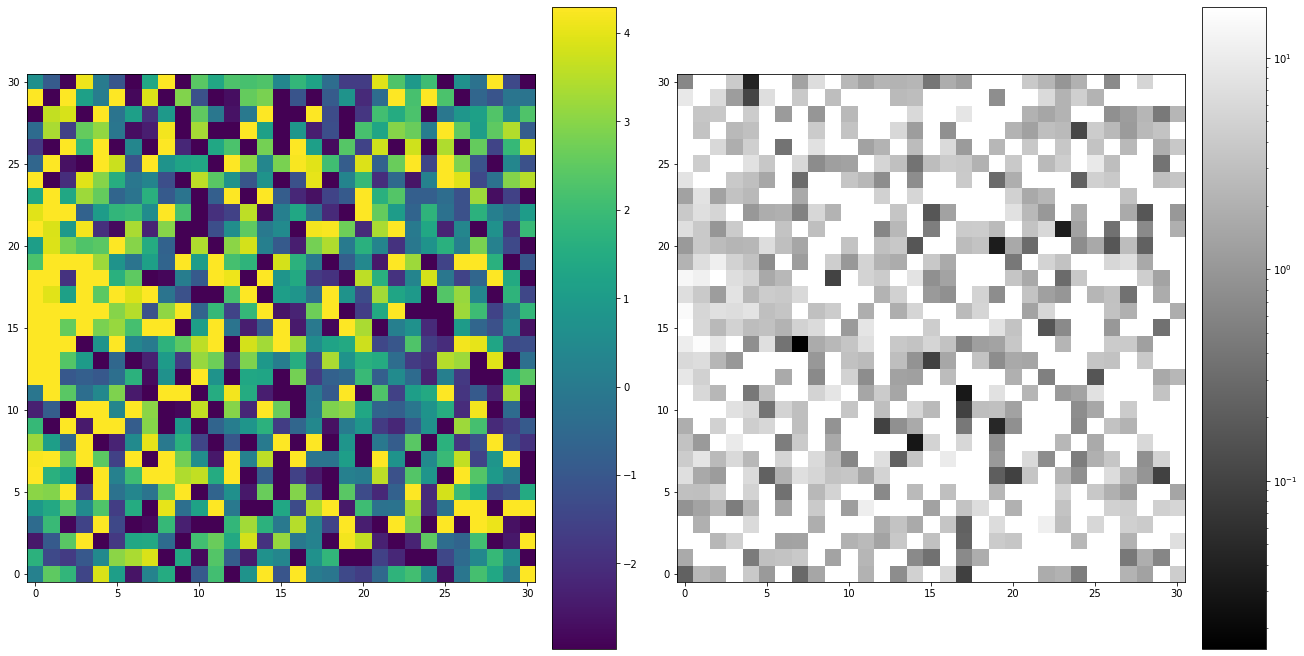

In [41]:
plotOnePeak(calExp.image.array, cx,cy)

In [53]:
(nx,ny) = estimateCOM(calExp.image.array, cx,cy, roi_size=16, seek_size=50)

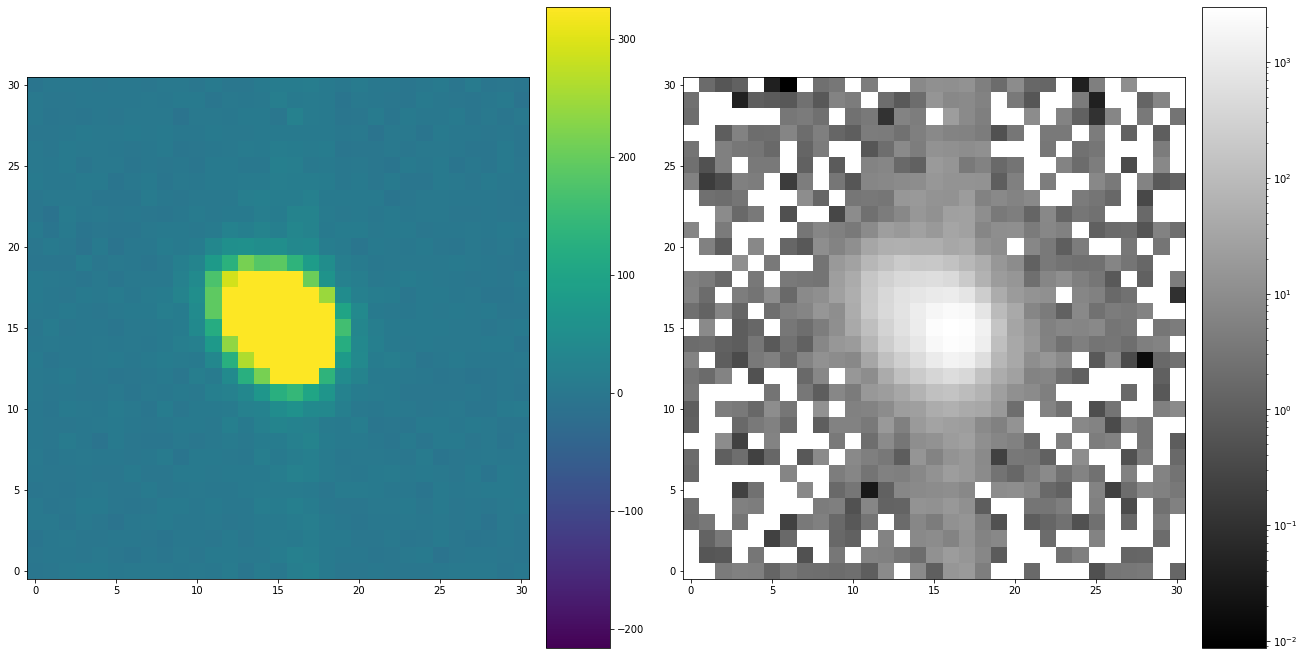

In [54]:
plotOnePeak(calExp.image.array, nx,ny)

In [50]:
def estimateCOM(image, cx, cy, roi_size=30, doBck=True, nRows=5, seek_size=None):
    """
    estimate center of mass 
    if seek_size is given, recentration will be tried using the seek_size
    if doBck = True it used the rRowns outside of the roi_size to evaluate the bck level and substract it to the roi sub_image
    Return centroid of the center of mass in px
    """
    if seek_size is not None:
        (cx,cy) = estimateCOM(image, cx, cy, roi_size=seek_size, doBck=doBck, nRows=nRows)       
    
    indx = int(cy)
    indy = int(cx)
    half = int(roi_size/2)
    
    outer_data = selectRoi(image, cx, cy, roi_size=roi_size, doBck=doBck, nRows=nRows)            
    y, x = center_of_mass(outer_data)  

    return indy - half + x + 0.5, indx - half + y + 0.5